In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
import scipy.stats
from matplotlib import cm
import seaborn as sns
import ast
import scipy.cluster.hierarchy as hierarchy

In [2]:
df = pd.read_csv('Jet_2D_Linkage.csv') #this is my density distance
df = df.sort_values('ACCESS1-0')
df_jet = df.set_index('models')

In [3]:
df = pd.read_csv('High_2D_Linkage.csv') #this is my density distance
df = df.sort_values('ACCESS1-0')
df_high = df.set_index('models')

In [4]:
df = pd.read_csv('Front_Linkage.csv') #this is my density distance
df = df.sort_values('ACCESS1-0')
df_front = df.set_index('models')

In [5]:
def getnormalized(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [6]:
df = getnormalized(df_high) + getnormalized(df_jet) + getnormalized(df_front)

In [7]:
df = df.dropna(0,how='all').dropna(1,how='all')

In [8]:
df.round(3)

,ACCESS1-0,ACCESS1-3,BNU-ESM,CNRM-CM5,ERA5,GFDL-CM3,GFDL-ESM2G,GFDL-ESM2M,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC-ESM-CHEM,MIROC5,MRI-CGCM3,MRI-ESM1,NOAA,bcc-csm1-1,bcc-csm1-1-m
models,,,,,,,,,,,,,,,,,
ACCESS1-0,0.000,0.930,2.023,1.898,0.922,1.510,1.426,1.455,2.403,2.568,2.091,2.396,1.671,1.706,1.077,1.512,1.392
ACCESS1-3,0.962,0.000,2.213,2.088,1.146,1.605,1.303,1.339,2.320,2.381,2.324,2.533,1.778,1.811,1.241,1.603,1.456
BNU-ESM,1.664,1.758,0.000,1.532,1.600,1.872,1.865,1.762,1.440,1.893,1.323,2.469,2.358,2.408,1.700,1.551,1.421
CNRM-CM5,1.682,1.812,1.602,0.000,1.598,1.908,1.644,1.508,1.713,2.077,1.714,2.030,2.426,2.458,1.668,1.413,1.617
ERA5,0.884,1.063,1.874,1.720,0.000,1.605,1.387,1.416,2.332,2.494,1.968,2.330,1.802,1.849,0.818,1.237,1.303
GFDL-CM3,1.364,1.406,2.009,1.897,1.501,0.000,1.372,1.507,2.131,2.055,2.017,1.811,1.627,1.623,1.518,1.942,1.451
GFDL-ESM2G,1.318,1.162,2.065,1.667,1.330,1.417,0.000,0.605,2.149,2.285,2.226,2.062,2.010,2.055,1.504,1.699,1.595
GFDL-ESM2M,1.274,1.127,1.847,1.454,1.282,1.484,0.573,0.000,2.000,2.180,2.028,1.964,2.006,2.046,1.417,1.561,1.452
IPSL-CM5A-LR,2.563,2.403,1.906,2.140,2.586,2.549,2.518,2.487,0.000,1.186,1.644,2.916,2.949,2.949,2.564,2.289,2.389


In [9]:
df.round(3).to_csv('linkage_distances.csv')

In [10]:
file = open("Knutti_colours_dict.txt", "r")
contents = file.read()
dict = ast.literal_eval(contents)
file.close()

In [11]:
cols = [dict[index] for index in df.index]

In [12]:
Z = hierarchy.linkage(df, 'ward', metric='euclidean')

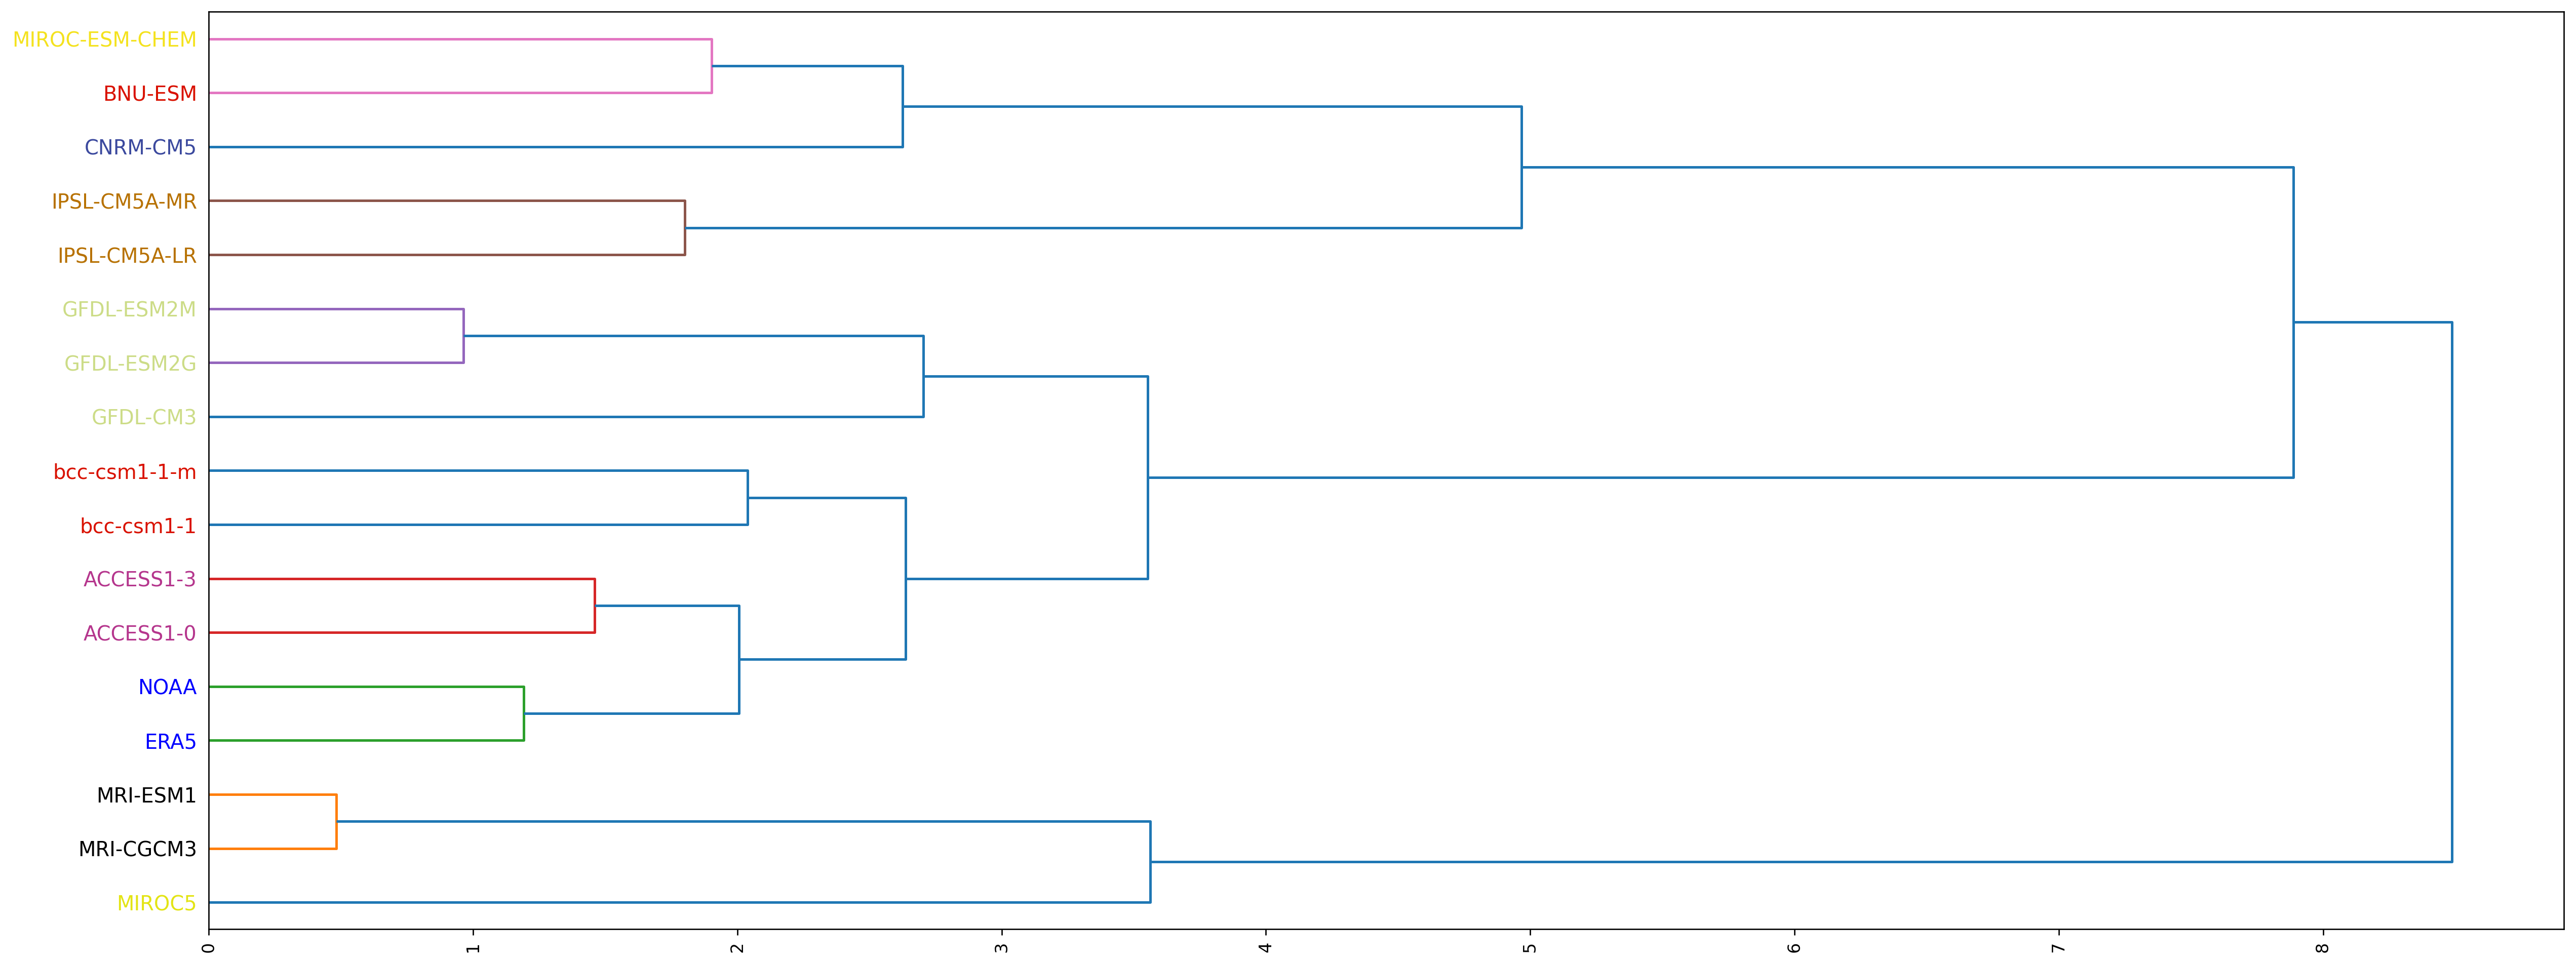

In [13]:
fig = plt.figure(figsize=(25, 10),dpi = 240)
dn = hierarchy.dendrogram(Z,
                        color_threshold=2,
                        labels=list(df.index),
                        orientation='right')

# Apply the right color to each label

cols = [dict[index] for index in dn['ivl']]

ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
num=-1
for lbl in ylbls:
    num+=1
    lbl.set_color(cols[num])


plt.xticks(rotation=90)
plt.savefig('linkageplot.png',dpi = 240)
plt.savefig('linkageplot.pdf')

In [12]:
labels = [ylbls[i].get_text() for i in range(len(ylbls))]

In [13]:
labels

['MIROC5',
 'MRI-CGCM3',
 'MRI-ESM1',
 'ERA5',
 'NOAA',
 'ACCESS1-0',
 'ACCESS1-3',
 'bcc-csm1-1',
 'bcc-csm1-1-m',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'CNRM-CM5',
 'BNU-ESM',
 'MIROC-ESM-CHEM']